In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wandb

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")


matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

font = { 'family' : 'normal', 'size'   : 14}

matplotlib.rc('font', **font)

# set title size to 14
matplotlib.rcParams['axes.titlesize'] = 14
# set y label size to 14
matplotlib.rcParams['axes.labelsize'] = 14

project_name = "master-thesis"

def get_runs(project_name, run_name):
    """
    Returns all runs with a given name in a given project.
    """
    api = wandb.Api()
    runs = api.runs(
        project_name, {
            "$and": [
                {"displayName": run_name},
                {"state": "finished"},
                {"tags": "phcd_paper_splits_tfds"}
                ]
            })
    return [run.id for run in runs]

interesting_run_names = ["architecture-baseline", "architecture-1", "architecture-2", "architecture-4", "architecture-5", "architecture-6", "architecture-7"]
architectures = ["Baseline", "Architecture A", "Architecture B", "Architecture C", "Architecture D", "Architecture E", "Architecture F"]

Getting results from run:  architecture-baseline


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-1


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-2


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-4


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-5


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-6


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-7


wandb:   1 of 1 files downloaded.  


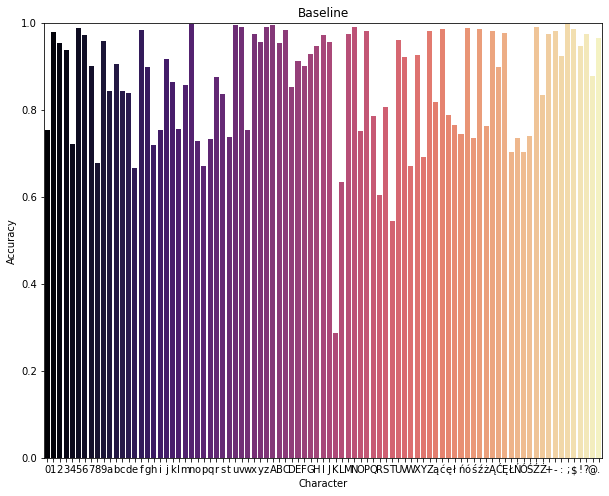

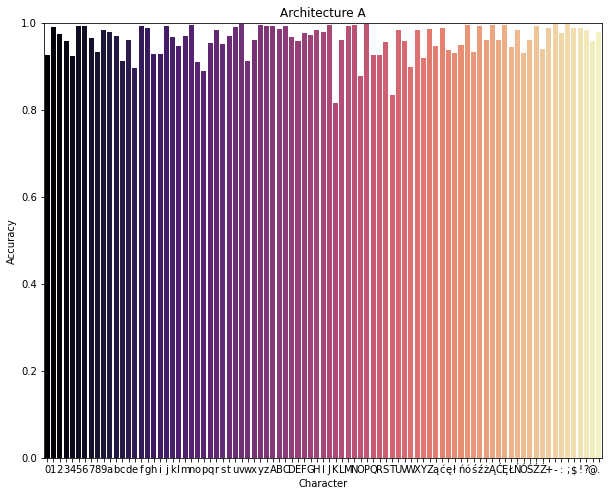

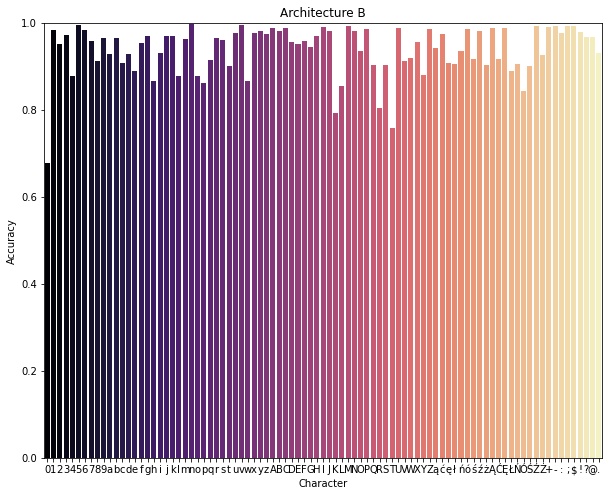

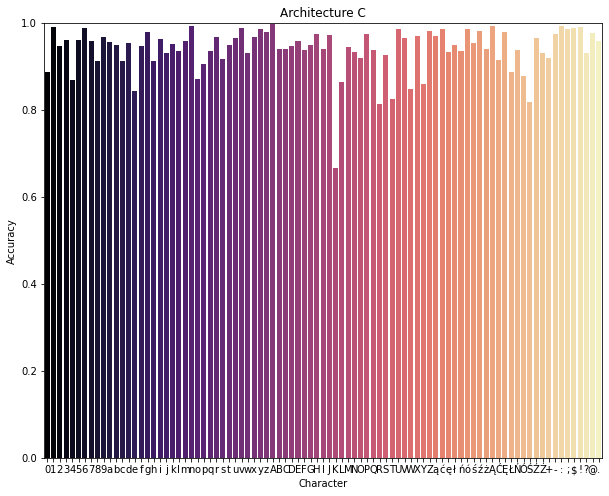

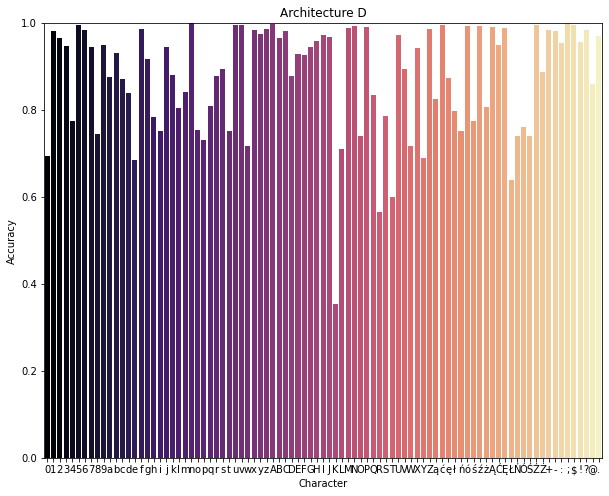

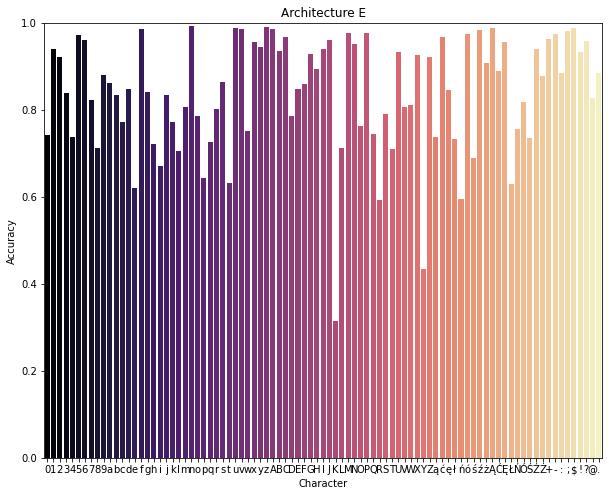

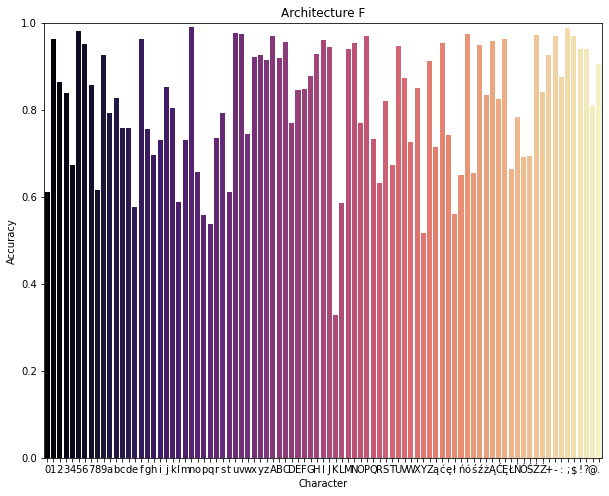

In [3]:
main_df = pd.DataFrame(columns=["class_name", "class_accuracy", "run_name"])
# from each run, download Table of results
for run_name in interesting_run_names:
    print("Getting results from run: ", run_name)
    run_id = get_runs(project_name, run_name)[0]
    api = wandb.Api()
    artifact = api.artifact(f"gratkadlafana/{project_name}/run-{run_id}-accuracy_per_class:v0")
    table = artifact.get("accuracy_per_class")

    # transform wandb table to Pandas dataframe by using for ndx, row in table.iterrows()
    class_accuracy = table.get_column("Accuracy", convert_to="numpy")
    class_name = table.get_column("Class", convert_to="numpy")
    df = pd.DataFrame({ "class_name": class_name, "class_accuracy": class_accuracy, "run_name": run_name })
    # append to main dataframe
    main_df = main_df.append(df, ignore_index=True)

# plot results - accuracy per class - show each run in a separate plot. There will be 5 plots. Title of each plot should be ith element from list architectures
number_of_plots = len(interesting_run_names)

for i, run_name in enumerate(interesting_run_names):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    df = main_df[main_df["run_name"] == run_name]
    ax.set_title(architectures[i])
    ax.set_ylim(0, 1)
    sns.barplot(x="class_name", y="class_accuracy", data=df, ax=ax, palette="magma")
    # set x axis label to "Znak"
    ax.set_xlabel("Character")
    # set y axis label to "Dokładność"
    ax.set_ylabel("Accuracy")

    plt.show()

Getting results from run:  architecture-baseline


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-1


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-2


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-4


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-5


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-6


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-7


wandb:   1 of 1 files downloaded.  


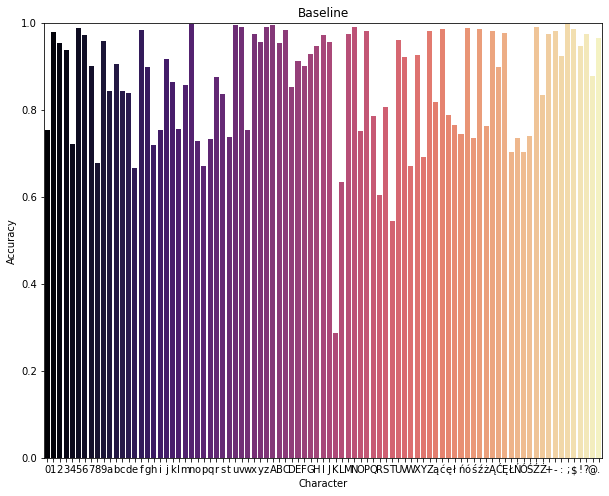

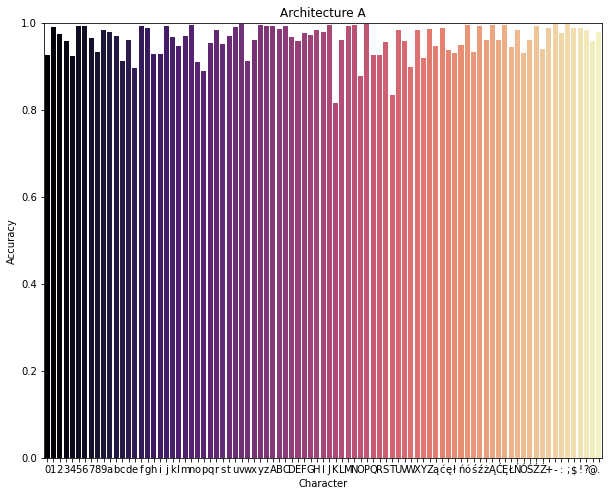

In [13]:
main_df = pd.DataFrame(columns=["class_name", "class_accuracy", "run_name"])
# from each run, download Table of results
for run_name in interesting_run_names:
    print("Getting results from run: ", run_name)
    run_id = get_runs(project_name, run_name)[0]
    api = wandb.Api()
    artifact = api.artifact(f"gratkadlafana/{project_name}/run-{run_id}-accuracy_per_class:v0")
    table = artifact.get("accuracy_per_class")

    # transform wandb table to Pandas dataframe by using for ndx, row in table.iterrows()
    class_accuracy = table.get_column("Accuracy", convert_to="numpy")
    class_name = table.get_column("Class", convert_to="numpy")
    df = pd.DataFrame({ "class_name": class_name, "class_accuracy": class_accuracy, "run_name": run_name })
    # append to main dataframe
    main_df = main_df.append(df, ignore_index=True)

# plot results - accuracy per class - show each run in a separate plot. There will be 5 plots. Title of each plot should be ith element from list architectures

interesting_run_names_short = interesting_run_names[:2]
number_of_plots = len(interesting_run_names_short)

for i, run_name in enumerate(interesting_run_names_short):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    df = main_df[main_df["run_name"] == run_name]
    ax.set_title(architectures[i])
    ax.set_ylim(0, 1)
    sns.barplot(x="class_name", y="class_accuracy", data=df, ax=ax, palette="magma")
    # set x axis label to "Znak"
    ax.set_xlabel("Character")
    # set y axis label to "Dokładność"
    ax.set_ylabel("Accuracy")
    plt.show()

In [55]:
interesting_run_names_short = interesting_run_names

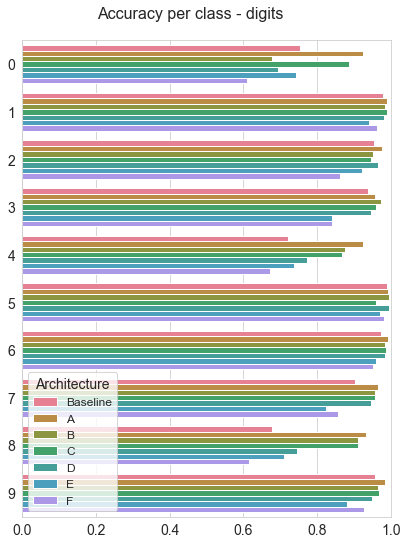

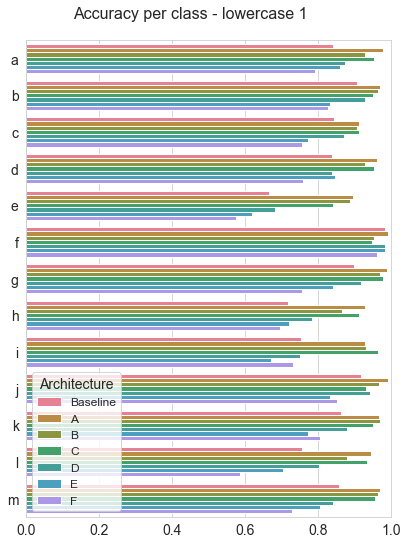

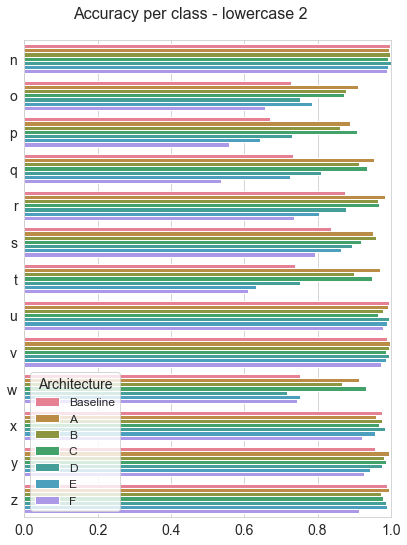

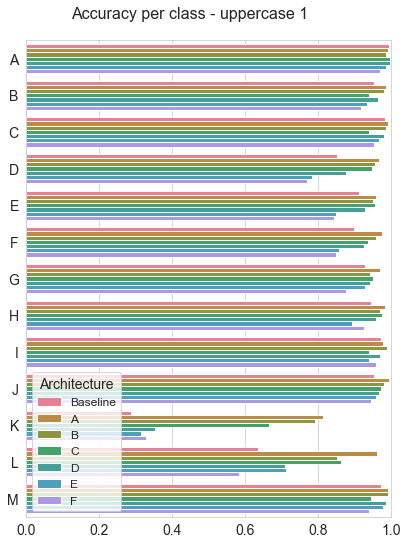

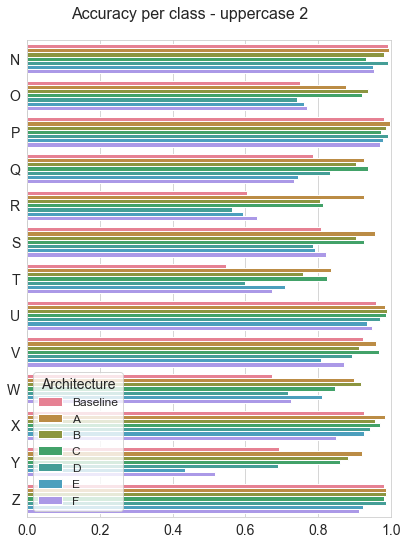

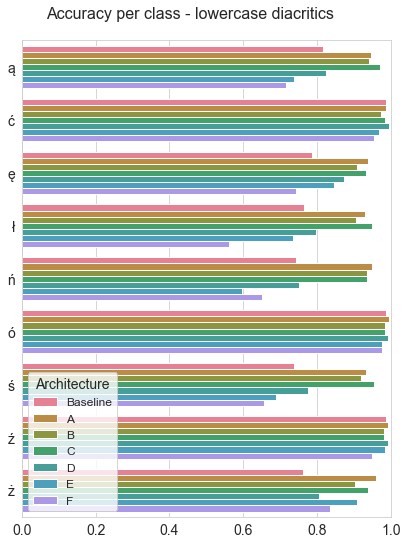

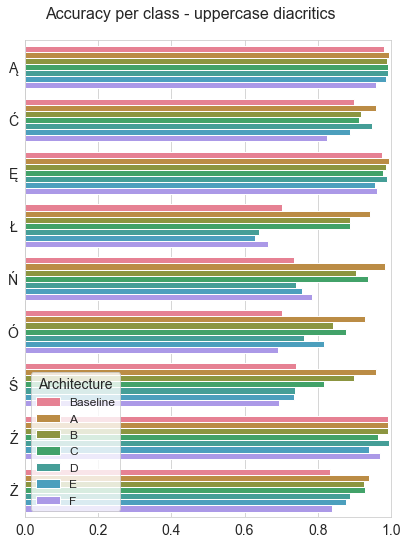

In [83]:
digits = "0123456789"
lowercase_1 = "abcdefghijklm"
lowercase_2 = "nopqrstuvwxyz"
uppercase_1 = "ABCDEFGHIJKLM"
uppercase_2 = "NOPQRSTUVWXYZ"
diacritics_lower = "ąćęłńóśźż"
diacritics_upper = "ĄĆĘŁŃÓŚŹŻ"

chart_chars = [digits, lowercase_1, lowercase_2, uppercase_1, uppercase_2, diacritics_lower, diacritics_upper]

chart_chars_names = ["Digits", "Lowercase 1", "Lowercase 2", "Uppercase 1", "Uppercase 2", "Lowercase diacritics", "Uppercase diacritics"]

char_palette = sns.color_palette("husl", 8)

sns.set_style("whitegrid")

for i, chars in enumerate(chart_chars):
    fig, ax = plt.subplots(1, 1, figsize=(6, 8))
    #ax = ax.flatten()
    # set suptitle to "Accuracy per class - Baseline vs A"
    fig.suptitle("Accuracy per class - " + chart_chars_names[i].lower(), fontsize=16)

    data = main_df[main_df["run_name"].isin(interesting_run_names_short) & main_df["class_name"].isin(list(chars))].copy()

    # change run_names architecture-baseline to Baseline and architecture-1 to A
    data["run_name"] = data["run_name"].replace({
        "architecture-baseline": "Baseline", 
        "architecture-1": "A", 
        "architecture-2": "B", 
        "architecture-4": "C",
        "architecture-5": "D",
        "architecture-6": "E",
        "architecture-7": "F"
        })
    sns.barplot(y="class_name", x="class_accuracy", hue="run_name", data=data, ax=ax, palette=char_palette)

    # set legend title to "Architecture" - lower right corner and set fontsize to 12
    # set legend values to "Baseline" and "A"
    ax.legend(title="Architecture", loc="lower left", fontsize=12)
    # make chart fit to the figure
    plt.tight_layout()
    # hide y, x axis labels
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_xlim(0, 1)
    # save figure to file ".png"
    plt.savefig(f"figures/{chart_chars_names[i]}.png", dpi=300)


In [4]:
run_name = interesting_run_names[0]
df = main_df[main_df["run_name"] == run_name]
print(f"Architecture: {architectures[0]}")
print("5 best classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=False).head(5))
print("5 worst classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=True).head(5).sort_values(by="class_accuracy", ascending=False))

Architecture: Baseline
5 best classes:


,class_name,class_accuracy
23,n,0.997563
83,;,0.997543
30,u,0.994262
36,A,0.994258
78,Ź,0.991079


5 worst classes:


,class_name,class_accuracy
14,e,0.666939
47,L,0.635102
53,R,0.604082
55,T,0.545604
46,K,0.287700


In [5]:
run_name = interesting_run_names[1]
df = main_df[main_df["run_name"] == run_name]
print(f"Architecture: {architectures[1]}")
print("5 best classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=False).head(5))
print("5 worst classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=True).head(5).sort_values(by="class_accuracy", ascending=False))

Architecture: Architecture A
5 best classes:


,class_name,class_accuracy
170,-,0.997561
172,;,0.997543
120,v,0.997529
140,P,0.996516
123,y,0.995948


5 worst classes:


,class_name,class_accuracy
103,e,0.896890
114,p,0.888616
139,O,0.877250
144,T,0.834018
135,K,0.815149


In [6]:
run_name = interesting_run_names[2]
df = main_df[main_df["run_name"] == run_name]
print(f"Architecture: {architectures[2]}")
print("5 best classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=False).head(5))
print("5 worst classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=True).head(5).sort_values(by="class_accuracy", ascending=False))

Architecture: Architecture B
5 best classes:


,class_name,class_accuracy
201,n,0.997563
209,v,0.995881
183,5,0.995086
256,Ź,0.993512
262,$,0.993469


5 worst classes:


,class_name,class_accuracy
254,Ó,0.842798
231,R,0.804898
224,K,0.792912
233,T,0.758422
178,0,0.678571


In [7]:
run_name = interesting_run_names[3]
df = main_df[main_df["run_name"] == run_name]
print(f"Architecture: {architectures[3]}")
print("5 best classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=False).head(5))
print("5 worst classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=True).head(5).sort_values(by="class_accuracy", ascending=False))

Architecture: Architecture C
5 best classes:


,class_name,class_accuracy
303,A,0.997539
349,:,0.992707
338,Ą,0.992683
290,n,0.991877
268,1,0.990276


5 worst classes:


,class_name,class_accuracy
281,e,0.842881
322,T,0.824979
344,Ś,0.817884
320,R,0.813878
313,K,0.667130


In [8]:
run_name = interesting_run_names[4]
df = main_df[main_df["run_name"] == run_name]
print(f"Architecture: {architectures[4]}")
print("5 best classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=False).head(5))
print("5 worst classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=True).head(5).sort_values(by="class_accuracy", ascending=False))

Architecture: Architecture D
5 best classes:


,class_name,class_accuracy
439,;,1.000000
379,n,0.999188
392,A,0.997539
440,$,0.995918
386,u,0.995902


5 worst classes:


,class_name,class_accuracy
370,e,0.684124
430,Ł,0.639251
411,T,0.599014
409,R,0.564082
402,K,0.353718
